# Boston Housing Dataset Regression

## Contents
- Supervised Learning 
- Unsupervised Learning 
- Semi-supervised Learning


### Importing basic libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest
%config Completer.use_jedi = False

In [4]:
from sklearn.datasets import load_boston
data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Supervised Learning

## Assumption of Linear Regression

- http://r-statistics.co/Assumptions-of-Linear-Regression.html

#### Prediction function

In [6]:
model = LinearRegression()
model.fit(data.data, data.target)
print('score:', model.score(data.data,data.target))

score: 0.7406426641094095


#### Function to find a residual

In [7]:
def residual(model, features, label):
    predicted = model.predict(features)
    df_result = pd.DataFrame({'Actual':label,'predicted':predicted})
    df_result['residual']=(df_result['Actual'])-(df_result['predicted'])
    return df_result

In [8]:
df_result=residual(model,data.data, data.target)

### Check Linearity

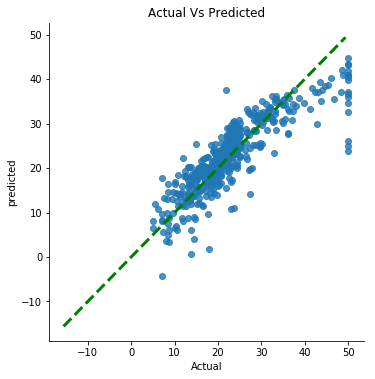

In [9]:
sns.lmplot(x='Actual', y='predicted', data=df_result, fit_reg=False)
cord=np.arange(df_result.min().min(),df_result.max().max())
plt.plot(cord,cord,"g--",linewidth=3)
plt.title("Actual Vs Predicted")
plt.show()

- Above plot is the scatter plot of the residuals
- Not most of the points lies around the diagonal line, although majority of them do lie around the diagonal line

### check Normality (Anderson Darling test)

In [10]:
from statsmodels.stats.diagnostic import normal_ad

p_value: 2.1621834631733667e-25
residual are not normally dist


C:\Users\swos\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\swos\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\swos\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


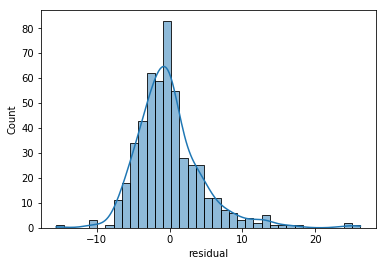

In [11]:
p_value=normal_ad(df_result['residual'])[1]
print('p_value:',p_value)
if (p_value<0.05) :
                                         
    print("residual are not normally dist")
else:
    print("normally dist")
sns.histplot(df_result["residual"],kde=True)
plt.show()

- Data is not normal distribution, it can be seen from the test that has higher score.
- The reasons could be due to outliers or most probably in our case due to different measurements

### Checking multi collinearity test

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

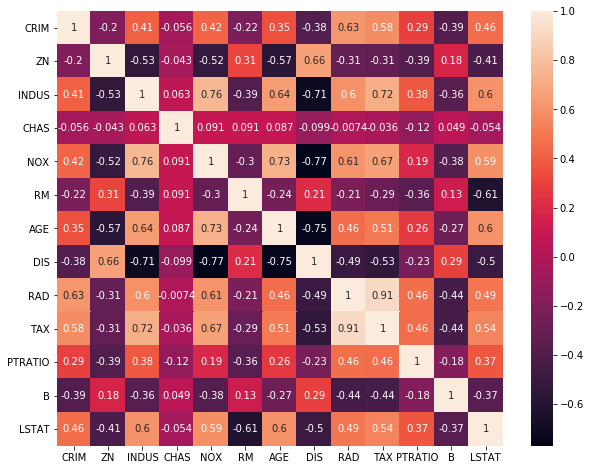

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

- From the correlation here we can see there are few variables that are highly correlated with each other. So, they must be removed 

#### Using VIF

- VIF is a metric computed for every X variable that goes into a linear model. If the VIF of a variable is high, it means the information in that variable is already explained by other X variables present in the given model, which means, more redundant is that variable. So, lower the VIF (<2) the better. VIF for a X var is calculated as:


VIF=1/(1−Rsq)


where, Rsq is the Rsq term for the model with given X as response against all other Xs that went into the model as predictors.
- Practically, if two of the X′s have high correlation, they will likely have high VIFs. Generally, VIF for an X variable should be less than 4 in order to be accepted as not causing multi-collinearity. The cutoff is kept as low as 2, if you want to be strict about your X variables.

In [14]:
features = data.data
feature_name = data.feature_names

VIF=[variance_inflation_factor(features,i) for i in range(features.shape[1])]
for i,v in enumerate(VIF):
    print(f"feature {feature_name[i]}: vif : {v}")
possible_multicollinearity=sum(map(lambda x: x>10,VIF))
Multicollinearity=sum([1 for vif in VIF if vif>100])
print(f"{possible_multicollinearity} case of possible multicollinearity")
print(f"{Multicollinearity} case of multicollinearity")

feature CRIM: vif : 2.1003728199615224
feature ZN: vif : 2.8440132669462637
feature INDUS: vif : 14.485757706539331
feature CHAS: vif : 1.1529518589418777
feature NOX: vif : 73.89494652814788
feature RM: vif : 77.94828304638538
feature AGE: vif : 21.38685048994309
feature DIS: vif : 14.6996523837492
feature RAD: vif : 15.167724857920897
feature TAX: vif : 61.227274009649456
feature PTRATIO: vif : 85.02954731061801
feature B: vif : 20.104942636229136
feature LSTAT: vif : 11.102024772203539
10 case of possible multicollinearity
0 case of multicollinearity


- From the Vif score with the threshold of 10, we can see that most of the features are correlated to each other, so most probably, we dont need most of the features to fit a model

### Homosedascity
- Violation of the homoscedasticity assumption results in heteroscedasticity when values of the dependent variable seem to increase or decrease as a function of the independent variables. Typically, homoscedasticity violations occur when one or more of the variables under investigation are not normally distributed
-To evaluate homoscedasticity using calculated variances, some statisticians use this general rule of thumb: If the ratio of the largest sample variance to the smallest sample variance does not exceed 1.5, the groups satisfy the requirement of homoscedasticity
-refers to a condition in which the variance of the residual, or error term, in a regression model is constant. That is, the error term does not vary much as the value of the predictor variable changes

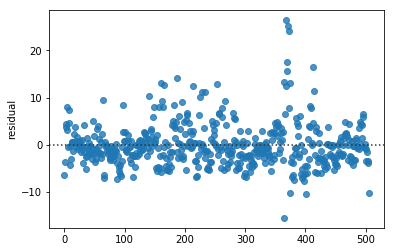

In [15]:
sns.residplot(x=df_result.index, y=df_result.residual, line_kws={'lw':2,'color':'#4682b4'})

- The variance is not uniform so may be ridge and lasso will perform better for this dataset

### OLS

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [17]:
data.target.shape

(506,)

In [18]:
X_boston = sm.add_constant(data.data)
est = sm.OLS(data.target, data.data).fit()

In [19]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Wed, 10 Mar 2021   Prob (F-statistic):                        0.00
Time:                        15:22:03   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0929      0.034     -2.699      0.007      -0.161      -0.025
x2             0.0487      0.014      3.382      0.001       0.020       0.077
x3            -0.0041      0.064     -0.063      0.950      -0.131       0.123
x4             2.8540      0.904      3.157      0.002       1.078       4.630
x5            -2.8684      3.359     -0.854      0.394      -9.468       3.731
x6             5.9281      0.309     19.178      0.000       5.321       6.535
x7            -0.0073      0.014     -0.526      0.599      -0.034       0.020
x8            -0.9685      0.196     -4.951      0.000      -1.353      -0.584
x9             0.1712      0.067      2.564      0.011       0.040       0.302
x10           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
x11           -0.3922      0.110     -3.570      0.000      -0.608      -0.176
x12            0.0149      0.003      5.528      0.000       0.010       0.020
x13           -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### OLS

In [20]:
df['Price']=data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [21]:
m = ols('Price ~ CRIM+ ZN+ INDUS+CHAS +NOX +RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 10 Mar 2021   Prob (F-statistic):          6.72e-135
Time:                        15:22:04   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

-From this table also we can see from the p values, how the target (price) is not affected by some features i.e. higher p (usually greater than 0.05) value has less effect on the target variable
- From the table above it can be clearly seen that indus and age have very less effect according to their p values to the target

##  Feature Selection & Scaling

- Since our data is not normally distributed and there might be some outlier in the distribution, we can either choose MinMAx scaler or Robust scaler
- Since all the features are not important as seen from the OLS, we are using the selectKBEst to select 11 features from the mutual info regression function

In [22]:
selector = feature_selection.SelectKBest(score_func=feature_selection.mutual_info_regression,
                                        k=11)
feat_selection = selector.fit_transform(data.data, data.target)
relation_with_target = feature_selection.mutual_info_regression(data.data, data.target)
feat_selection.shape 
relation_with_target# New shape of the selected data

array([0.34330862, 0.18896522, 0.46411323, 0.01866903, 0.46811786,
       0.52989741, 0.31554986, 0.29975884, 0.22318724, 0.37112815,
       0.44470971, 0.16880585, 0.66530092])

In [23]:
col=df.iloc[:,np.argwhere(relation_with_target<0.5).flatten()].columns
col

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B'],
      dtype='object')

- Since different algorithms gives better results with different scaling methods (either minmax or robust), it is better to scale the data in the pipeline before fitting the model



## Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [25]:
X_train,X_test,y_train,y_test = train_test_split(feat_selection, data.target, random_state=42)

In [26]:
pipe = Pipeline([
    ('scaler',MinMaxScaler()),
    ('Lr', LinearRegression())
])
print('Cross validation score',np.mean(cross_val_score(pipe,X_train,y_train, cv=10)))


Cross validation score 0.7019351845848144


In [27]:

pipe.fit(X_train,y_train)
print(f'Training score: {pipe.score(X_train,y_train)}')
print(f'Testing score: {pipe.score(X_test,y_test)}')

Training score: 0.7294997432205005
Testing score: 0.7048940509979134


#### Error

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
y_pred = pipe.predict(X_test)
print(f'rmse:{np.sqrt(mean_squared_error(y_test,y_pred))}')

rmse:4.545924183706092


- Linear regression provides aboout 72 percent accuracy in the training set while just 70 on the testing so this model is pretty good but the accuracy could be better.

### Linear Regression using polynomial features

In [30]:
ploy_model=Pipeline([
    ("poly_feature",PolynomialFeatures(degree=2,include_bias=False,interaction_only=True)),
    ("scale",MinMaxScaler()),
    ("lin_reg",LinearRegression())
])
print(f'Cross Validation score: {np.mean(cross_val_score(ploy_model,X_train,y_train,cv=5))}')
ploy_model.fit(X_train,y_train)
print(f'Training score:{ploy_model.score(X_train,y_train)}')

Cross Validation score: 0.8329821373498539
Training score:0.9063562660183251


In [31]:
y_pred = ploy_model.predict(X_test)
print(f'rmse:{np.sqrt(mean_squared_error(y_test,y_pred))}')

rmse:3.443543767769316


- The polynomial model is doing slightly better than the linear

## Ridge Regression

In [32]:
pipe = Pipeline([
    ('scaler',MinMaxScaler()),
    ('ridge', Ridge())
])
param = {
    'ridge__alpha':[0.001,0.01,0.1,1,10,100,1000]
}
grid = GridSearchCV(pipe, param_grid=param,cv=5)
grid.fit(X_train,y_train)
print(f'Best score: {grid.best_score_}')
print(f'Best parameters: {grid.best_params_}')


Best score: 0.7031148594852134
Best parameters: {'ridge__alpha': 0.1}


- From the grid search CV, we can find the best parameter of ridge but the score is not better with the linear.

In [33]:
scaler=MinMaxScaler()
X_scaled = scaler.fit_transform(feat_selection) 
X_train,X_test,y_train,y_test = train_test_split(X_scaled, data.target,random_state=42)
ridge = Ridge(alpha=0.01)
print(f'cross validation score: {np.mean(cross_val_score(ridge, X_train,y_train,cv=5))}')


cross validation score: 0.7026198368336397


In [34]:
ridge.fit(X_train,y_train)
print(f'Training score: {ridge.score(X_train,y_train)}')
print(f'Testing score: {ridge.score(X_test,y_test)}')
y_pred = ridge.predict(X_test)
print(f'rmse:{np.sqrt(mean_squared_error(y_test,y_pred))}')

Training score: 0.729498923403815
Testing score: 0.7050113159167531
rmse:4.545020897277229


- The result is very similar to the linear regression

### Ridge with polynomial

In [35]:
ploy_model=Pipeline([
    ("poly_feature",PolynomialFeatures(degree=2,include_bias=False,interaction_only=True)),
    ("scale",MinMaxScaler()),
    ("ridge",Ridge(alpha=0.1))
])
print(f'Cross Validation score: {np.mean(cross_val_score(ploy_model,X_train,y_train,cv=5))}')
ploy_model.fit(X_train,y_train)
print(f'Training score:{ploy_model.score(X_train,y_train)}')

Cross Validation score: 0.8407640768713772
Training score:0.8895616237412394


In [36]:
y_pred = ploy_model.predict(X_test)
print(f'rmse:{np.sqrt(mean_squared_error(y_test,y_pred))}')

rmse:3.458647801841868


- Similar to linear regression with polynomial features, the model does slightly better than the linear model

## Lasso

In [37]:
pipe = Pipeline([
    ('scaler',MinMaxScaler()),
    ('lasso', Lasso())
])
param = {
    'lasso__alpha':[0.001,0.01,0.1,1,10,100,1000]
}
grid = GridSearchCV(pipe, param_grid=param,cv=5)
grid.fit(X_train,y_train)
print(f'Best score: {grid.best_score_}')
print(f'Best parameters: {grid.best_params_}')


Best score: 0.7025531813917588
Best parameters: {'lasso__alpha': 0.001}


In [38]:
scaler=MinMaxScaler()
X_scaled = scaler.fit_transform(feat_selection) 
X_train,X_test,y_train,y_test = train_test_split(X_scaled, data.target,random_state=42)
lasso = Lasso(alpha=.01)
print(f'cross validation score: {np.mean(cross_val_score(lasso, X_train,y_train,cv=5))}')

cross validation score: 0.7013721466501036


In [39]:
lasso.fit(X_train,y_train)
print(f'Training score: {lasso.score(X_train,y_train)}')
print(f'Testing score: {lasso.score(X_test,y_test)}')
y_pred = lasso.predict(X_test)
print(f'rmse:{np.sqrt(mean_squared_error(y_test,y_pred))}')

Training score: 0.728229029681327
Testing score: 0.7026344138942208
rmse:4.563295148910569


- Lasso doesnot do any better than linear or ridge. The model is slightly overfitting and still doesnot provide the best accuracy

## Support Vector Regressor

In [40]:
from sklearn.svm import SVR

In [41]:

pipe = Pipeline([
    ('scaler',MinMaxScaler()),
    ('svr', SVR())
])

param = {'svr__kernel':['rbf'],
    'svr__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'svr__gamma': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid=param, cv=5, scoring="r2", n_jobs=-1)
grid.fit(X_train, y_train)

print(f"Best params:\n{grid.best_params_}\n")
print(f"Best cross-validation score: {grid.best_score_:.2f}\n")

y_pred = grid.predict(X_test)
print(f"mean squared error: {mean_squared_error(y_test, y_pred):.2f}")

Best params:
{'svr__C': 100, 'svr__gamma': 1, 'svr__kernel': 'rbf'}

Best cross-validation score: 0.88

mean squared error: 9.96


In [42]:
pipe = Pipeline([
    ('scaler',MinMaxScaler()),
    ('svr', SVR(kernel='rbf', C=100,gamma=1))
])
pipe.fit(X_train,y_train)
print(f"Training score: {pipe.score(X_train,y_train)}")
print(f"Testing Score: {pipe.score(X_test,y_test)}")

Training score: 0.9381921346538948
Testing Score: 0.8577598418006775


- It takes a long time to find the best parameter this way
- Although, the mean squared error is higher, it provides better validation score.
-

## Decision Tree Regression

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
dt=DecisionTreeRegressor()
param = {'max_depth': [i for i in range(1,10)],
        'max_features': [i for i in range(1,X_train.shape[1])]}

grid = GridSearchCV(dt, param_grid=param, cv=5, scoring="r2", n_jobs=-1)
grid.fit(X_train, y_train)

print(f"Best params:\n{grid.best_params_}\n")
print(f"Best cross-validation score: {grid.best_score_:.2f}\n")

y_pred = grid.predict(X_test)
print(f"mean squared error: {mean_squared_error(y_test, y_pred):.2f}")

Best params:
{'max_depth': 7, 'max_features': 7}

Best cross-validation score: 0.79

mean squared error: 18.15


- From here we can see how the grid search provided us with the max depth=7 and max_features =7 as the best parameters for the decision tree
- The validation error and mean squared error are both worse than the previous model
- And also we can note that it used only 7 features so now we can chekc which features it picked

In [45]:
def plot_feature_importance(model,x,name):
    n_feature=x.shape[1]
    print(n_feature)
    plt.barh(range(n_feature),model.feature_importances_)
    plt.yticks(np.arange(n_feature),name)
    plt.xlabel("Feature importance")
    plt.ylabel("feature")

In [46]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

11


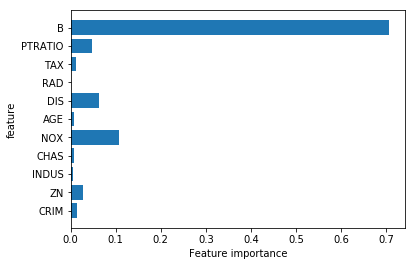

In [47]:
dt = DecisionTreeRegressor(max_depth=7, max_features=7, random_state=5)
dt.fit(X_train, y_train)
plot_feature_importance(dt,X_train,col)

- From this plot, it can be seen that how some features are highly influential in fitting the model while some are as influencial as none.

## Random Forest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor, VotingRegressor

In [51]:
rf = RandomForestRegressor(n_jobs=-1, random_state=5)

param = {'n_estimators': [200,300,400],
        'max_depth': [7,9,10,11,12],
        'max_features': [4,5,6,7]}

grid = GridSearchCV(rf, param_grid=param, n_jobs=-1, scoring="r2", cv=5)
grid.fit(X_train, y_train)

print(f"Best params:\n{grid.best_params_}\n")
print(f"Best cross-validation score: {grid.best_score_:.2f}\n")

y_pred = grid.predict(X_test)
print(f"mean squared error: {mean_squared_error(y_test, y_pred):.2f}")

Best params:
{'max_depth': 10, 'max_features': 6, 'n_estimators': 200}

Best cross-validation score: 0.85

mean squared error: 9.56


In [52]:
rf = RandomForestRegressor(max_depth=10,max_features=6, n_estimators=200,n_jobs=-1, random_state=5)
rf.fit(X_train,y_train)
print(f'Training score{rf.score(X_train,y_train)}')
print(f'Testing Score: {rf.score(X_test,y_test)}')

Training score0.9780086249072885
Testing Score: 0.8634162744461334


### Voting Classifier

In [53]:
log_clf=LinearRegression()
rnd_clf=RandomForestRegressor(n_estimators=300,max_depth=9,max_features=6)
svr_clf=SVR(kernel='rbf',C=100, gamma=1)

voting_reg=VotingRegressor(
    [("lr",log_clf),("rf",rnd_clf),("svr",svr_clf)]
)

In [54]:
score = cross_val_score(voting_reg, X_train, y_train, scoring="r2", n_jobs=-1, cv=5)

print(f"Average cross-validation score: {np.mean(score):.2f}\n")

voting_reg.fit(X_train, y_train)
y_pred = voting_reg.predict(X_test)

print(f"mean squared error: {mean_squared_error(y_test, y_pred):.2f}")

Average cross-validation score: 0.86

mean squared error: 10.09


## Bagging

In [55]:
from sklearn.ensemble import BaggingRegressor

svr = SVR(kernel="rbf", C=100, gamma=1)
bag_rg = BaggingRegressor(svr, n_jobs=-1, random_state=5, bootstrap=True)

score = cross_val_score(bag_rg, X_train, y_train, scoring="r2", n_jobs=-1, cv=5)
print(f"Average cross-validation score: {np.mean(score):.2f}\n")

bag_rg.fit(X_train, y_train)
y_pred = bag_rg.predict(X_test)

print(f"mean squared error: {mean_squared_error(y_test, y_pred):.2f}")

Average cross-validation score: 0.88

mean squared error: 10.22


In [56]:
svr = SVR(kernel="rbf", C=100, gamma=1)
bag_rg = BaggingRegressor(svr, n_jobs=-1, random_state=5, bootstrap=True)

param = {'n_estimators': [10,30,50,100],
        'max_features': [i for i in range(1,X_train.shape[1])]}

grid = GridSearchCV(bag_rg, param_grid=param, cv=5, scoring="r2", n_jobs=-1)
grid.fit(X_train, y_train)

print(f"Best params:\n{grid.best_params_}\n")
print(f"Best cross-validation score: {grid.best_score_:.2f}\n")

y_pred = grid.predict(X_test)
print(f"mean squared error: {mean_squared_error(y_test, y_pred):.2f}")

Best params:
{'max_features': 10, 'n_estimators': 100}

Best cross-validation score: 0.88

mean squared error: 10.89


In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [58]:
X_train,X_test,y_train,y_test = train_test_split(data.data, data.target, random_state=42)

In [59]:
past_clf=BaggingRegressor(DecisionTreeRegressor(max_leaf_nodes=9,random_state=42),
                         n_estimators=100, max_samples=100,
                         bootstrap=False, random_state=42,
                          n_jobs=-1)
past_clf.fit(X_train,y_train)
print(f" traning acc: {past_clf.score(X_train,y_train)}")
print(f" testing acc: {past_clf.score(X_test,y_test)}")

 traning acc: 0.871178666393958
 testing acc: 0.795599496689207


### Out of Bag Evaluation

In [60]:
oob_reg=BaggingRegressor(DecisionTreeRegressor(max_leaf_nodes=6,max_features=7,random_state=42),
                         n_estimators=100, max_samples=100,
                         bootstrap=True, random_state=42,
                          n_jobs=-1,
                           oob_score=True,)
oob_reg.fit(X_train,y_train)
print(f" traning acc: {oob_reg.score(X_train,y_train)}")
print(f" validation acc: {oob_reg.oob_score_}")
print(f" testing acc: {oob_reg.score(X_test,y_test)}")

 traning acc: 0.8337162981224495
 validation acc: 0.7807369054347484
 testing acc: 0.750236281843554


## Boosting

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

In [62]:
gbrt=GradientBoostingRegressor(max_depth=3,learning_rate=1,n_estimators=5,max_leaf_nodes=8)
gbrt.fit(X_train,y_train)
print(f'Training: {gbrt.score(X_train,y_train)}')
print(f'Testing: {gbrt.score(X_test,y_test)}')


Training: 0.9327721194335672
Testing: 0.7771286562526972


####  ADA boost

In [63]:
from sklearn.ensemble import AdaBoostRegressor

dt = DecisionTreeRegressor(max_depth=6, max_features=7, random_state=5)
ada_rg = AdaBoostRegressor(base_estimator=dt, random_state=5)

param = {'n_estimators': [50,100,200],
        'learning_rate': [i for i in np.arange(0.1,2.1,0.1)]}

grid = GridSearchCV(ada_rg, param_grid=param, n_jobs=-1, scoring="r2", cv=5)
grid.fit(X_train, y_train)

print(f"Best params:\n{grid.best_params_}\n")
print(f"Best cross-validation score: {grid.best_score_:.2f}\n")

y_pred = grid.predict(X_test)
print(f"mean square error: {mean_squared_error(y_test, y_pred):.2f}")

Best params:
{'learning_rate': 0.8, 'n_estimators': 100}

Best cross-validation score: 0.85

mean square error: 11.09


In [64]:
X_train, X_test, y_train, y_test = train_test_split(
data.data, data.target, random_state=0)
pipe = Pipeline([('preprocessing', StandardScaler()), ('regressor', SVR())])
param_grid = [
{'regressor': [SVR()], 
 'preprocessing': [StandardScaler(), None],
'regressor__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
'regressor__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'regressor': [Ridge()],
    'preprocessing':[StandardScaler(), MinMaxScaler(), None],
    'regressor__alpha':[0,0.1,0.5,1,5,10,20]},
    {'regressor': [LinearRegression()],
    'preprocessing':[StandardScaler(),MinMaxScaler(),None],
    },
    
{'regressor': [RandomForestRegressor(n_estimators=100)],
'preprocessing': [None], 
'regressor__max_features': [ 3,4,5,6,7],
'regressor__max_depth':[3,4,5,6]}
]
#X_train, X_test, y_train, y_test = train_test_split(
#cancer.data, cancer.target, random_state=0)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'preprocessing': None, 'regressor': RandomForestRegressor(max_depth=6, max_features=5), 'regressor__max_depth': 6, 'regressor__max_features': 5}

Best cross-validation score: 0.86
Test-set score: 0.73


### Conclusion of Supervised learning

- After fitting the data through many regression models, we can see that random forest provides better training score but the model is slightly overfitting with the best parameters.
- Linear models have lower accuracy but the model is not overfitting as much
- Polynomial features gives better accuracy and model with the linear models
- Support Vector does as good as the linear models

# Dimension Reduction

## PCA

In [65]:
from sklearn.decomposition import PCA

In [66]:
X=data.data
y = data.target

In [67]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
print(f'The shape of transformed X : {X_pca.shape}')
print(f'Variance : {pca.explained_variance_ratio_}')

The shape of transformed X : (506, 2)
Variance : [0.80582318 0.16305197]


- Since we do not have much features(only 13), so preseving 95% of the data only already gives us with 2 features only.
- The 2 variance shows the variance preserved by the first component and second component respectively.
- Below we can see few components of X_pca

In [68]:
print(f'The first 10 components \n{X_pca[:10]} ') 

The first 10 components 
[[-119.81884272   -5.56005586]
 [-168.89015548   10.11620863]
 [-169.31170747   14.0805323 ]
 [-190.23064226   18.3024633 ]
 [-190.13345103   16.09794743]
 [-188.95057656   18.72916255]
 [-104.33599656   -8.73550927]
 [-102.09430837  -10.10802955]
 [ -98.5282714    -0.24790911]
 [-100.030155     -0.31766787]] 


In [69]:
X_recovered = pca.inverse_transform(X_pca)
print(f'The shape of the recovered data :{X_recovered.shape}')

The shape of the recovered data :(506, 13)


- We have got all the features back with the pca inverse transform method.
- We can check how it differs from the original dataset using the mean_squared_error

In [70]:
from sklearn.metrics import mean_squared_error
reconstruction_error = mean_squared_error(X, X_recovered)
print(f'The reconstruction error between original and recovered data: {reconstruction_error}')

The reconstruction error between original and recovered data: 91.59711211033571


- The reconstruction error is quite high, so we have to try other dimension reduction techniques to check if we can minimize the error

## Kernel PCA

In [71]:
from sklearn.decomposition import KernelPCA

In [72]:
kpca_rbf = KernelPCA(n_components =2, kernel='rbf', gamma =0.01, fit_inverse_transform=True)
X_reduced_rbf = kpca_rbf.fit_transform(X)
print(X_reduced_rbf.shape)

(506, 2)


In [73]:
X_recovered_rbf = kpca_rbf.inverse_transform(X_reduced_rbf)

In [74]:
reconstruction_error_rbf = mean_squared_error(X, X_recovered_rbf)
print(f'The reconstruction error between original and recovered data: {reconstruction_error_rbf}')

The reconstruction error between original and recovered data: 1.772104324882849e-23


- The reconstruction error is remarkabely reduced as it is the negative exponential
- We can use gridsearch to see what and how other kernels will do with the kernel pca

In [75]:
from sklearn.model_selection  import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

In [76]:
pipe=Pipeline([
    ("kpca",KernelPCA(n_components=2)),
    ("lreg",SVR())
])
param={ "kpca__gamma":np.linspace(0.00001,0.001,10),
      "kpca__kernel":["rbf","sigmoid","poly"]}

grid=GridSearchCV(pipe,param_grid=param,cv=3)
grid.fit(X,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('lreg', SVR())]),
             param_grid={'kpca__gamma': array([1.0e-05, 1.2e-04, 2.3e-04, 3.4e-04, 4.5e-04, 5.6e-04, 6.7e-04,
       7.8e-04, 8.9e-04, 1.0e-03]),
                         'kpca__kernel': ['rbf', 'sigmoid', 'poly']})

In [77]:
grid.best_params_

{'kpca__gamma': 1e-05, 'kpca__kernel': 'rbf'}

In [78]:
best_pca=KernelPCA(n_components=2,kernel="rbf",gamma=0.00005,
                  fit_inverse_transform=True)
X_reduced=best_pca.fit_transform(X)
X_inv=best_pca.inverse_transform(X_reduced)

In [79]:
print(f'The reconstruction error is : {mean_squared_error(X,X_inv)}')

The reconstruction error is : 1.599383734290956e-23


### Using the reduced X from KernelPCa to do SVR

In [80]:
X_train_reduced,X_test_reduced,y_train,y_test = train_test_split(X_reduced, y, random_state=42)

In [81]:
print(X_train_reduced.shape, y_train.shape)

(379, 2) (379,)


In [82]:
pipe = Pipeline([
    ('scaler',MinMaxScaler()),
    ('kernelPCA',KernelPCA(n_components=2,kernel="rbf",gamma=0.00005)),
    ('svr', SVR(kernel='rbf', C=100,gamma=10))
])
pipe.fit(X_train,y_train)
print(f"Training score: {pipe.score(X_train,y_train)}")
y_pred = pipe.predict(X_test)
print(f"mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Testing Score: {pipe.score(X_test,y_test)}")

Training score: -0.01687985964445704
mean squared error: 70.22
Testing Score: -0.002778221382998103


- As we can see how the model score has changed drastically and doing worse by choosing the same parameter without dimension reduction, lets check what the grid search will give us 

In [83]:
pipe = Pipeline([
    ('scaler',MinMaxScaler()),
    ('kernelPCA',KernelPCA(n_components=2,kernel="rbf",gamma=0.00005)),
    ('svr', SVR())
])

param = {'svr__kernel':['rbf','linear','poly'],
    'svr__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'svr__gamma': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid=param, cv=5, scoring="r2", n_jobs=-1)
grid.fit(X_train, y_train)

print(f"Best params:\n{grid.best_params_}\n")
print(f"Best cross-validation score: {grid.best_score_:.2f}\n")

y_pred = grid.predict(X_test)
print(f"mean squared error: {mean_squared_error(y_test, y_pred):.2f}")

Best params:
{'svr__C': 100, 'svr__gamma': 10, 'svr__kernel': 'rbf'}

Best cross-validation score: -0.03

mean squared error: 70.22


- Although kernelpca provided or reformed the components as close to the original ones, the svr with the kernelpca doesnot provide with acceptable results
- PCA, whereas provides us with almost as good as the score we got previously

In [84]:
pipe = Pipeline([
    ('scaler',MinMaxScaler()),
    ('pca', PCA(n_components=0.95)),
    ('svr', SVR(kernel='rbf', C=100,gamma=10))
])
pipe.fit(X_train,y_train)
print(f"Training score: {pipe.score(X_train,y_train)}")
y_pred = pipe.predict(X_test)
print(f"mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Testing Score: {pipe.score(X_test,y_test)}")

Training score: 0.611533638668573
mean squared error: 133.84
Testing Score: -0.911196818102787


## MDS, ISOMAP, t-sne

In [85]:
from sklearn.manifold import MDS, Isomap,TSNE

In [86]:
mds=MDS(n_components=2)
X_red_mds=mds.fit_transform(X)
isomap=Isomap(n_components=2)
X_red_iso=isomap.fit_transform(X)
tsne=TSNE(n_components=2)
X_red_tsne=tsne.fit_transform(X)


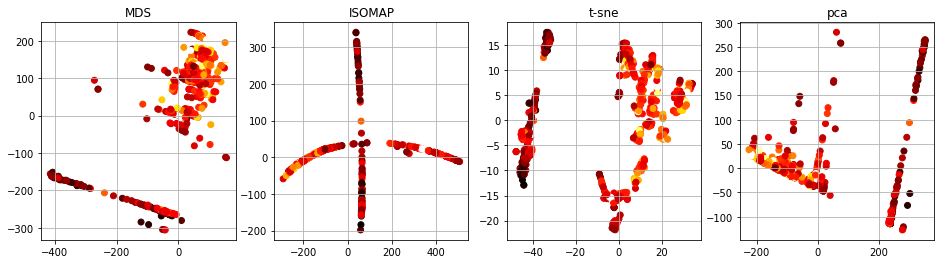

In [87]:
plt.figure(figsize=(16,4))
title=["MDS","ISOMAP","t-sne",'pca']

for  subplot,title,X_red in zip((141,142,143,144),title,
                                (X_red_mds,X_red_iso,X_red_tsne, X_pca)):    
    plt.subplot(subplot)
    plt.title(title)
    plt.scatter(X_red[:,0],X_red[:,1],c=y,cmap=plt.cm.hot)
    plt.grid(True)
    

- If we check the plot of two components from different plots, we can see that from isomap that the points can have four clusters or from tsne it can have many small clusters, which can be useful to do the semisupervised and unsupervised training 

# Unsupervised and SemiSupervised

In [88]:
df.count()
df1 = df.copy()
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


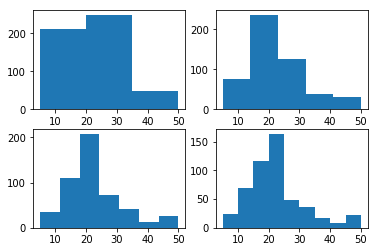

In [89]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
#fig.suptitle('Vertically stacked subplots')
ax1.hist(df.Price,bins=3);
ax2.hist(df.Price,bins=5)
ax3.hist(df.Price,bins=7);
ax4.hist(df.Price,bins=9);


- So dividing 3 will have one really small dataset 
- Even dividing with 5 most of the dataset falls in the middle so may be dviding the data into more bins of equal lenght may be better in this case

In [90]:
df1['price_label']=pd.qcut(df.Price,10,labels=range(0,10))


In [91]:
values = pd.qcut(df.Price,10).value_counts(sort=False)
print(values)

(4.999, 12.75]    51
(12.75, 15.3]     51
(15.3, 18.2]      51
(18.2, 19.7]      50
(19.7, 21.2]      53
(21.2, 22.7]      48
(22.7, 24.15]     50
(24.15, 28.2]     51
(28.2, 34.8]      50
(34.8, 50.0]      51
Name: Price, dtype: int64


- Here we divided the dataset into more or less into same number of bins 
- The reason to choose 10 is due to the difference in the maximum and minimum price in the dataset and since most of the dataset fall in the middle region, so may be it is better to have similar bin differences.
- When unseen data falls onto a particular label, it would be more practical to say the price falling in smaller range than a bigger range.

In [92]:
df1.price_label.value_counts(sort=False)

0    51
1    51
2    51
3    50
4    53
5    48
6    50
7    51
8    50
9    51
Name: price_label, dtype: int64

In [93]:
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price,price_label
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,6
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,5
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,8
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,8
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,9


## KMEANS

In [95]:
from sklearn.cluster import KMeans

### Stratified split

In [96]:
from sklearn.model_selection import StratifiedShuffleSplit

In [139]:
X=df1.iloc[:,:-1]
y= df1['price_label']


In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

In [99]:
print(X_train.shape)
print(X_test.shape)

(379, 14)
(127, 14)


### Finidng best K with silhouette score

In [100]:
from sklearn.metrics import silhouette_score
scores=[]
for i in range(2,50):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X_train)
    scores.append(silhouette_score(X_train,kmeans.labels_))

In [101]:
d=np.argmax(scores)+2
print(d)
len(scores)

3


48

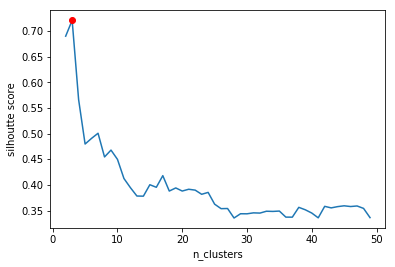

In [102]:
plt.figure(figsize=(6,4))
plt.plot(range(2,50),scores)
plt.xlabel("n_clusters")
plt.ylabel("silhoutte score")
plt.plot(d,max(scores),'ro')

- With the help of silhouetter score, we can see that the the score is best at k =3

In [103]:
scores=[]
for i in range(2,50):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X_pca)
    scores.append(silhouette_score(X_pca,kmeans.labels_))

In [104]:
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(X_train)
print('Best silhoutte score',silhouette_score(X_train,kmeans.labels_))

Best silhoutte score 0.7208236920928593


### Model Inertia

In [105]:
inertia=[]
for i in range(2,50):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

Text(0, 0.5, 'inertia')

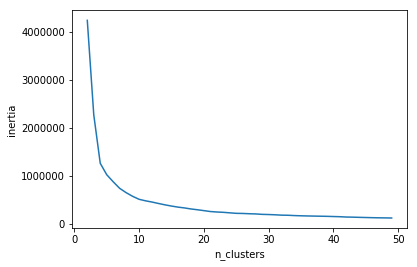

In [106]:

plt.figure(figsize=(6,4))
plt.plot(range(2,50),inertia)
plt.xlabel("n_clusters")
plt.ylabel("inertia")


- As we know, the model inertia decreases as the cluster increases, so we can say that at around 10 clusters the inertia has the best score because it started its curve and it is getting linearly downwards after that

### USing Grid search to find best K value

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
pipe=Pipeline([
    ("kmeans",KMeans(n_clusters=3,random_state=42)),
    ("randomforest",RandomForestClassifier(n_estimators=500,max_depth=6,max_leaf_nodes=7,random_state=42))
])
pipe.fit(X_train,y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=3, random_state=42)),
                ('randomforest',
                 RandomForestClassifier(max_depth=6, max_leaf_nodes=7,
                                        n_estimators=500, random_state=42))])

In [109]:
pipe.score(X_test,y_test)

0.2440944881889764

In [110]:
parm={"kmeans__n_clusters":range(2,50)}
grid=GridSearchCV(pipe,param_grid=parm,cv=3,verbose=2,n_jobs=-1)
grid.fit(X_train,y_train)
grid.best_score_


Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  1.5min finished


0.3138149397991918

In [111]:
grid.score(X_test,y_test)

0.2440944881889764

## Semi sUpervised

In [112]:
labeled_data = 100


In [113]:
k=10
kmeans=KMeans(n_clusters=k, random_state=42)
X_dist=kmeans.fit_transform(X_train) ## gives the distance between the point and the centroid
representative_idx=np.argmin(X_dist,axis=0) ## finding the least distance
X_rep=X_train.iloc[representative_idx] # getting the reprsentation from the index

In [114]:
y_rep = y_train.iloc[representative_idx]

#### Logistic Regression with only the labeled data

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
log_reg=LogisticRegression(multi_class="ovr",random_state=42,max_iter=1000)
log_reg.fit(X_train[:labeled_data],y_train[:labeled_data])

C:\Users\swos\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\swos\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

LogisticRegression(max_iter=1000, multi_class='ovr', random_state=42)

In [117]:
log_reg.score(X_test,y_test)

0.41732283464566927

#### Logistic Regression with the representative data

In [118]:
log_reg=LogisticRegression(multi_class="ovr",max_iter=1000,random_state=42)
log_reg.fit(X_rep,y_rep)

LogisticRegression(max_iter=1000, multi_class='ovr', random_state=42)

In [119]:
log_reg.score(X_test,y_test)

0.16535433070866143

- From the above two titles and its results, it is obvious that the representative wont do better than the labeled data only because the number of data points are less.
- In this case, even the labeled data will do worse than taking whole of the training set because we just chose random 100 data to be labeled so the data could be misproportionally divided and hence, keeping the score as low as 30%

## DBSCAN

In [120]:
from sklearn.cluster import DBSCAN

In [121]:
dbscan = DBSCAN(eps =8,min_samples =9)
dbscan.fit(X_pca)
np.unique(dbscan.labels_,return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64),
 array([131, 146,  59,  18,  31,  20,  11,  72,   8,  10], dtype=int64))

In [122]:
dbscan = DBSCAN(eps =12,min_samples =7)
dbscan.fit(X)
np.unique(dbscan.labels_,return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7], dtype=int64),
 array([369,  29,   9,  13,   7,  11,   9,  52,   7], dtype=int64))

- Just checking how the pca will effect the on generating clusters with DBSCAN from the pca data and the non pca data and since the dataset was divided into 10 equal parts. Hence trying to make the cluster number closer to the pre defined labels.

### CLassification models with dbscan

#### Logistic Regression

In [123]:
log_reg=LogisticRegression(max_iter=1000,C=0.01)
log_reg.fit(dbscan.components_,dbscan.labels_[dbscan.core_sample_indices_])

LogisticRegression(C=0.01, max_iter=1000)

In [124]:
log_reg.score(dbscan.components_,dbscan.labels_[dbscan.core_sample_indices_])

0.9885057471264368

#### SVM

In [125]:
svm=SVC(C=1,gamma=100)
svm.fit(dbscan.components_,dbscan.labels_[dbscan.core_sample_indices_])
svm.score(dbscan.components_,dbscan.labels_[dbscan.core_sample_indices_])

1.0

- Here we can see, by putting the same parameters from the supervised section in to the dbscan components, the models start to overfit.
- It may be due to fewer number of data points compared to the original dataset. 
- And also lots of data are marked as outliers and most of the data falls into one category as well

## Gaussian Mixture

- creating sample data using gaussian mixture and checking the error with the logistic Regression

In [126]:
from sklearn.mixture import GaussianMixture

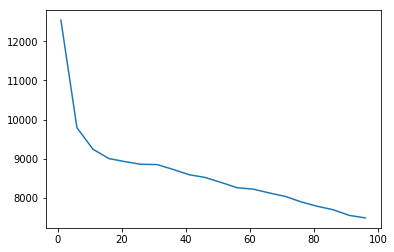

In [127]:
n_components = np.arange(1, 100, 5)
models = [GaussianMixture(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(X_pca).aic(X_pca) for model in models]
plt.plot(n_components, aics);

In [128]:
min_bic=np.infty
for i in range(1,50):
    for c in ("full","tied","spherical","diag"):
        bic=GaussianMixture(n_components=i,n_init=10,covariance_type=c,
                           random_state=42).fit(X_pca).bic(X_pca)
        
        if bic<min_bic:
            min_bic=bic
            best_k=i
            best_cov=c

In [129]:
print(best_k,best_cov)

26 full


In [147]:
gmm = GaussianMixture(10, covariance_type='full', random_state=0)
gmm.fit(X)
print(gmm.converged_)

True


In [148]:
X_new, y_new = gmm.sample(100)

In [132]:
#X_new_recovered = pca.inverse_transform(X_new)

In [149]:
X_new.shape

(100, 14)

In [150]:
log_reg_new = LogisticRegression()

In [151]:
log_reg_new.fit(X,y)

C:\Users\swos\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [152]:
log_reg_new.score(X,y)

0.5217391304347826

In [154]:
y_pred = log_reg_new.predict(X_new)

In [155]:
mean_squared_error(y_new,y_pred)

20.7

(100, 13)